# Intro ARIMA
#### ARIMA is statistical method for stationary data in timeseries analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

from luwiji.time_series import illustration, demo

## Konsep Stationary
sebuah data timeseries disebut stasioner ketika sifatnya tidak bergantung terhadap waktu. Timeseries data yang stasioner tidak memiliki pola yang dapat diprediksi pada jangka waktu panjang. Contoh:
1. stationary: white noise, cyclical time series aperiodic, no trend, no seasonality.
2. tidak stationary: time series data with trend or seasonality

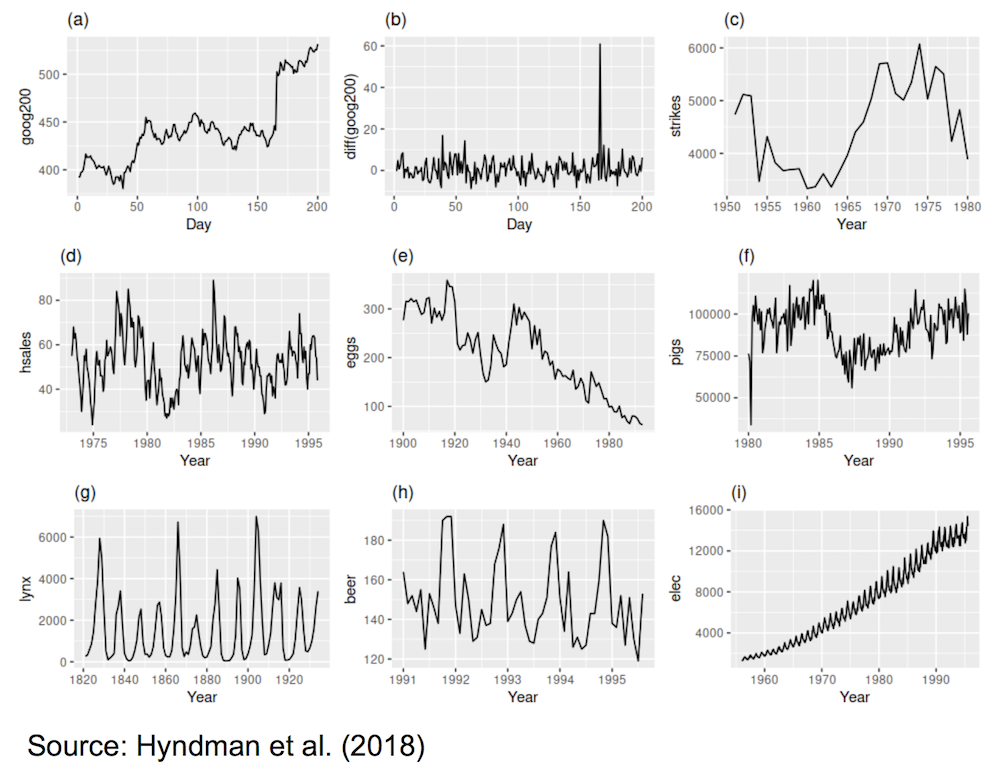

In [2]:
illustration.stationarity_quiz

## Uji Stasioner dengan ADF dan KPSS
1. ADF = Augmented Dicky-Fuller test
2. KPSS = Kwiatkowski-Philips-Schmidt-Shin Test

In [3]:
from jcopml.time_series import stationarity_tester

#### Example 1: Stationary

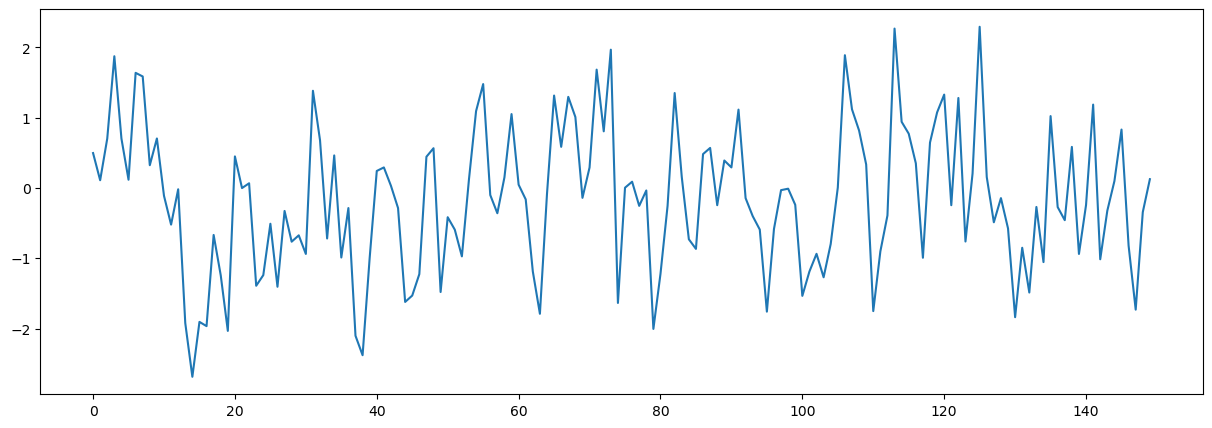

In [4]:
plt.figure(figsize=(15,5))
plt.plot(demo.stnry_data)

In [5]:
stationarity_tester(demo.stnry_data)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.863231,5.216419e-12,-3.475018,-2.881141,-2.577221,True
KPSS,0.131065,1.000000e-01,0.739000,0.463000,0.347000,False


#### Example 2: Trend

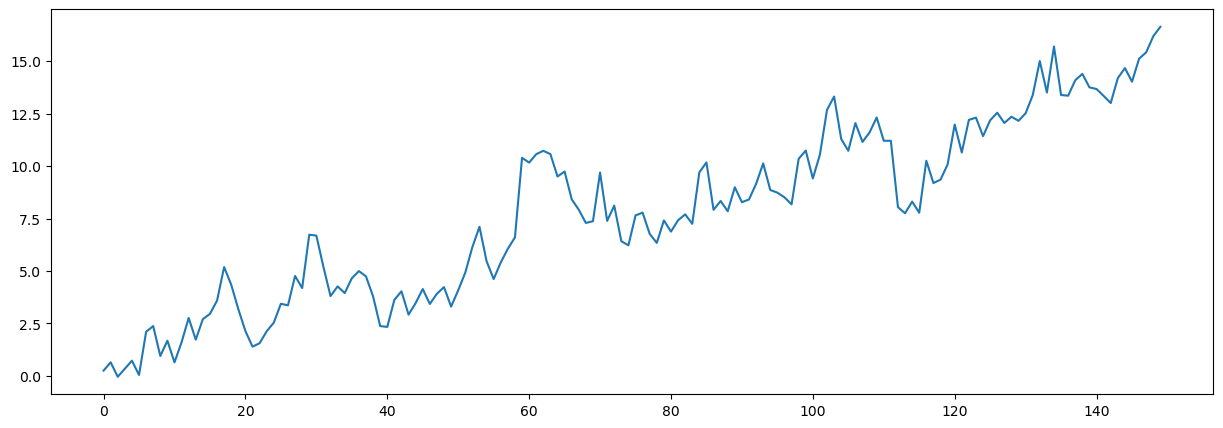

In [6]:
plt.figure(figsize=(15,5))
plt.plot(demo.trending_data)

In [7]:
stationarity_tester(demo.trending_data)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.077376,0.724009,-3.475325,-2.881275,-2.577293,False
KPSS,1.661763,0.010000,0.739000,0.463000,0.347000,True


#### Can non stationary data convert to stationary?
ARIMA method most use for stationary data. To use the method, data must be stationary.
1. the series data can convert to stationary by different value from t=0 to t=1. (differencing)

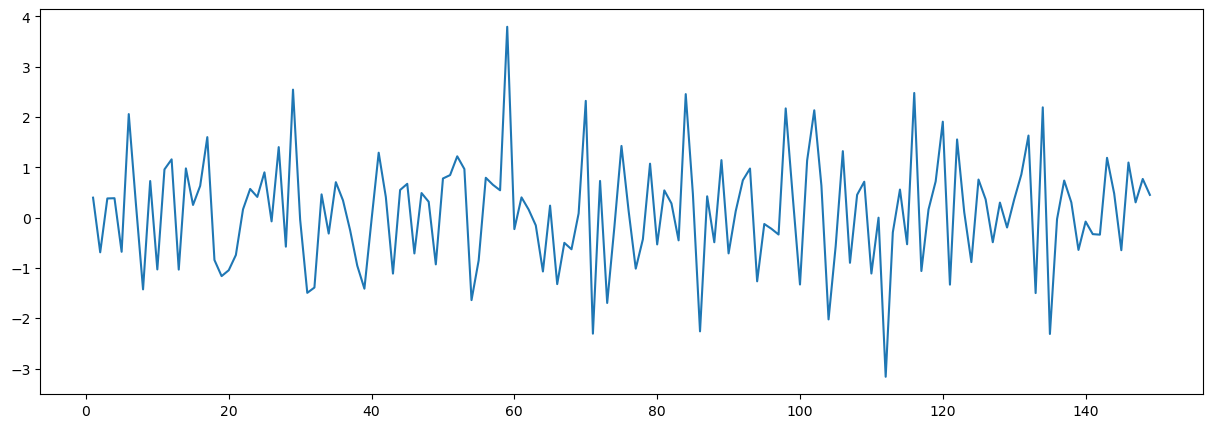

In [6]:
plt.figure(figsize=(15,5))
plt.plot(demo.trending_data.diff())

In [7]:
stationarity_tester(demo.trending_data.diff())

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.416320,8.048078e-27,-3.475325,-2.881275,-2.577293,True
KPSS,0.035351,1.000000e-01,0.739000,0.463000,0.347000,False


#### Example 3: Seasonal data

<AxesSubplot:xlabel='date'>

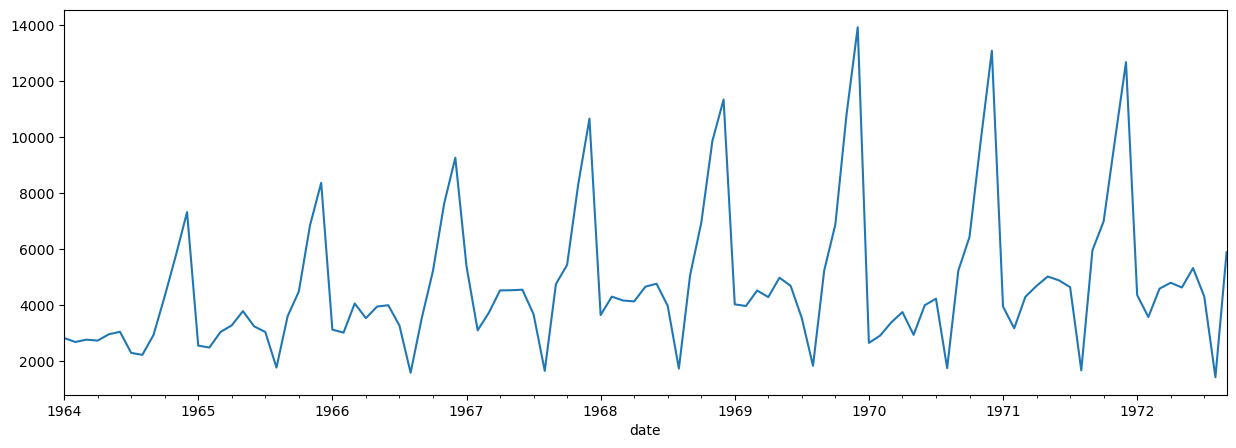

In [9]:
df = pd.read_csv('data/perrin_freres_champagne.csv', index_col='date',parse_dates=['date'])
series = df.sales 
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

In [10]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.833593,0.363916,-3.502705,-2.893158,-2.583637,False
KPSS,0.512672,0.038813,0.739000,0.463000,0.347000,True


##### The data can convert to stationary with differencing per season

<AxesSubplot:xlabel='date'>

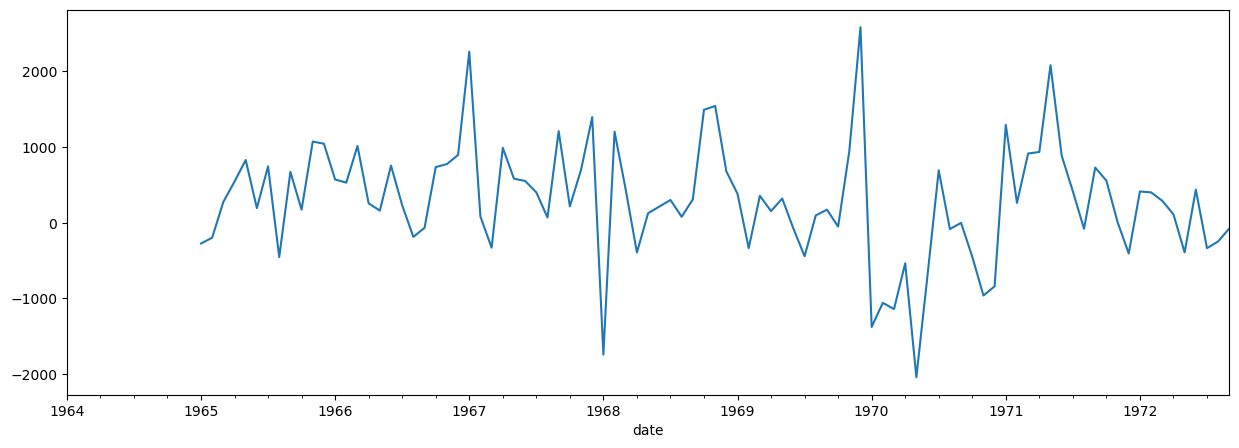

In [11]:
series.diff(12).plot(figsize=(15,5))

In [12]:
stationarity_tester(series.diff(12))

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.626619,2.060580e-11,-3.503515,-2.893508,-2.583824,True
KPSS,0.294397,1.000000e-01,0.739000,0.463000,0.347000,False


#### Example 4: trend and seasonal data

<AxesSubplot:xlabel='Date'>

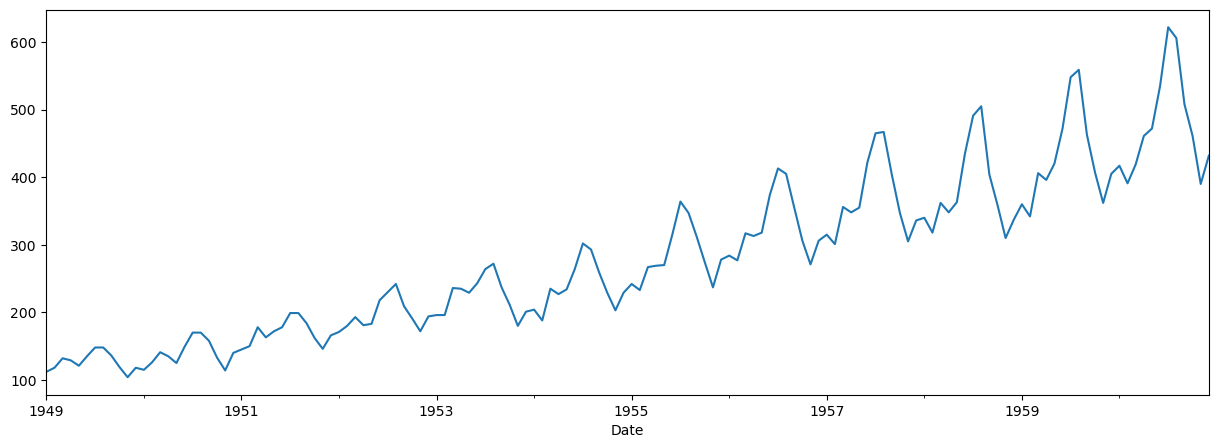

In [15]:
df = pd.read_csv('data/airline.csv', index_col='Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

In [17]:
from jcopml.time_series.decomposition import stl_decomposition

In [18]:
components = stl_decomposition(series)

<AxesSubplot:xlabel='Date'>

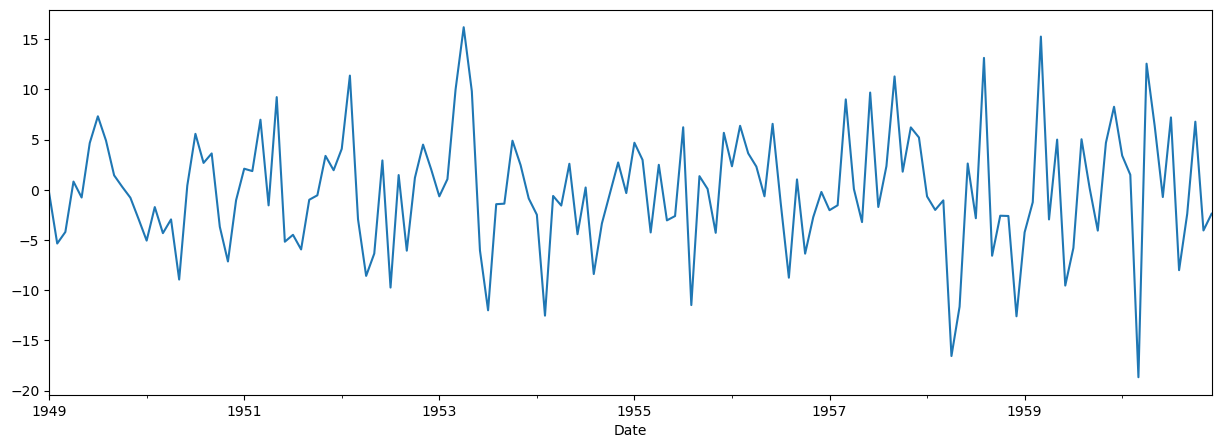

In [19]:
components.resid.plot(figsize=(15,5))

In [20]:
stationarity_tester(components.resid)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.098011,0.000014,-3.480119,-2.883362,-2.578407,True
KPSS,0.021308,0.100000,0.739000,0.463000,0.347000,False


#### Example 5: non-stationary